In [17]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [18]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [19]:
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: c.replace('config.', ''), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df.head()

,max_possible_throughput,expected_throughput,avg_throughput,controller,controller_config,model_file,state,mission_size,num_agents,sensor_generation_frequency,...,sensor_packet_lifecycle,maximum_simulation_steps,training,testing_repetitions,step_by_step,plots,verbose,live_testing_frequency,repetitions,controller.avg_reward
0,9.666667,0.966667,0.930265,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,3,...,inf,1000000,True,1,False,True,True,100000,1,8.759252e-03
1,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,3,...,inf,100000,False,1,False,True,True,100000,1,4.756243e-07
2,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,3,...,inf,200000,False,1,False,True,True,100000,1,0.000000e+00
3,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,3,...,inf,300000,False,1,False,True,True,100000,1,0.000000e+00
4,9.666667,0.966667,0.650056,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,3,...,inf,400000,False,1,False,True,True,100000,1,1.117467e-02


In [20]:
variable_columns = result_file['campaign_variables']
variable_columns

['repetitions', 'num_agents', 'mission_size', 'training']

In [21]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,max_possible_throughput,expected_throughput,avg_throughput,controller,controller_config,model_file,state,mission_size,num_agents,...,sensor_packet_lifecycle,maximum_simulation_steps,training,testing_repetitions,step_by_step,plots,verbose,live_testing_frequency,repetitions,controller.avg_reward
0,0,9.666667,0.966667,0.930265,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,...,inf,1000000,True,1,False,True,True,100000,1,8.759252e-03
1,1,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,...,inf,100000,False,1,False,True,True,100000,1,4.756243e-07
2,2,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,...,inf,200000,False,1,False,True,True,100000,1,0.000000e+00
3,3,9.666667,0.966667,0.000000,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,...,inf,300000,False,1,False,True,True,100000,1,0.000000e+00
4,4,9.666667,0.966667,0.650056,<class 'DQNLearner.DQNLearner'>,{'reward_function': <function smooth_unique_pa...,0.json,<class 'state.CommunicationMobilityPacketsState'>,30,1,...,inf,400000,False,1,False,True,True,100000,1,1.117467e-02


In [22]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['expected_throughput'],
    name='Expected Throughput',
    hovertemplate='<b>Expected Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(len(result_df))],
   tickvals=[i for i in range(len(result_df))],
)

fig.show()

In [23]:
result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [24]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

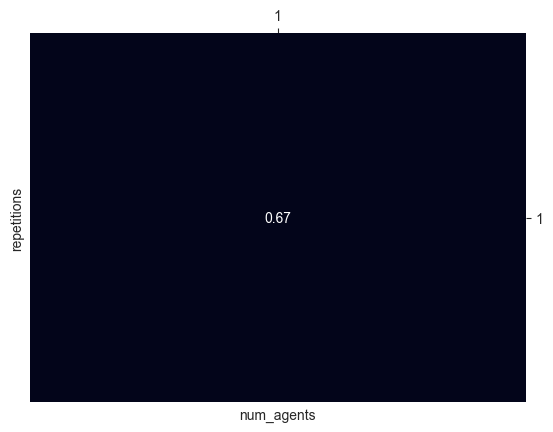

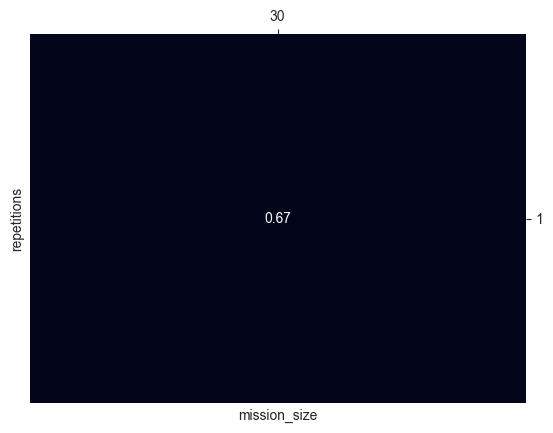

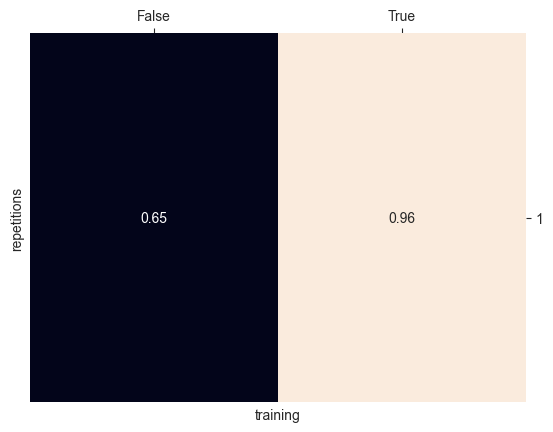

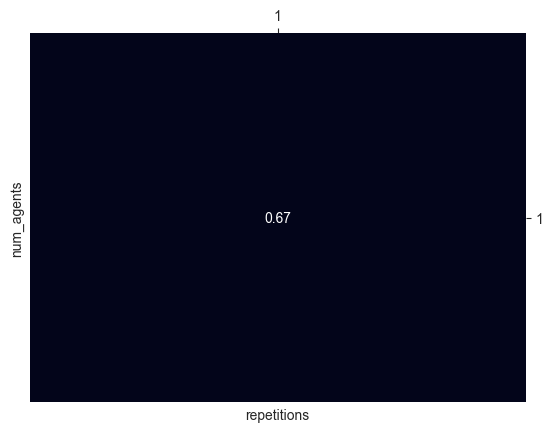

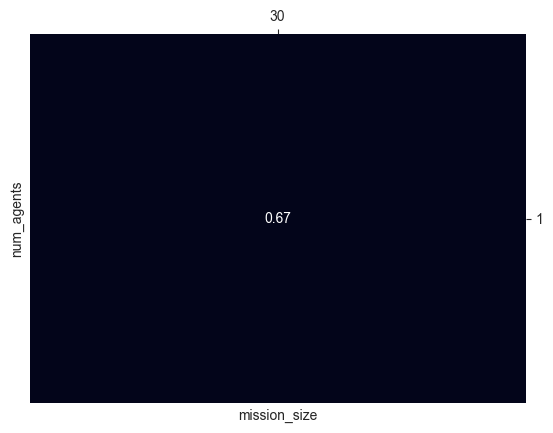

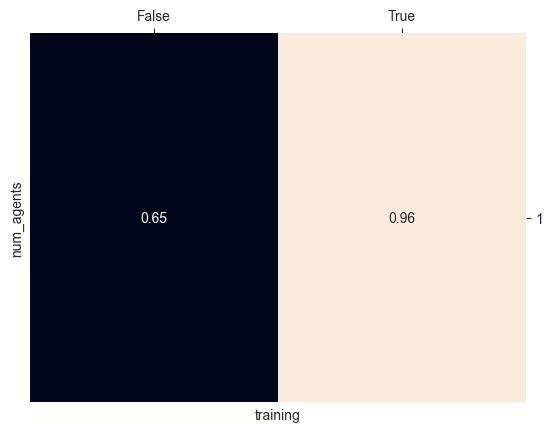

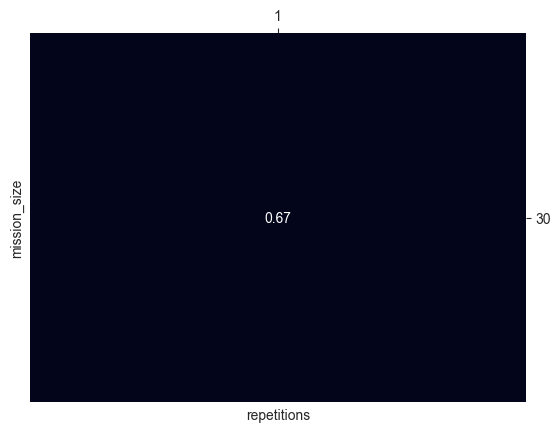

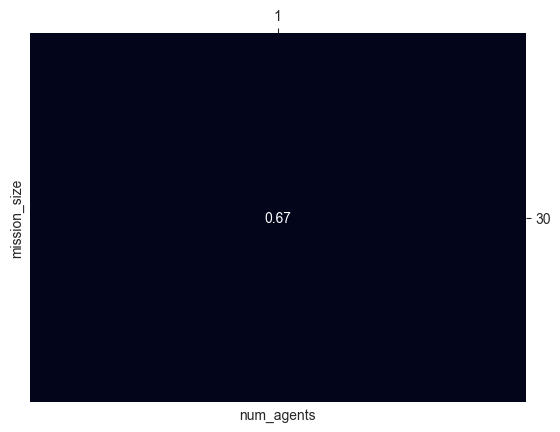

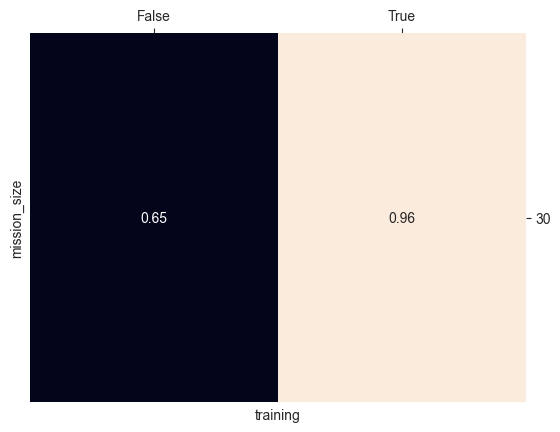

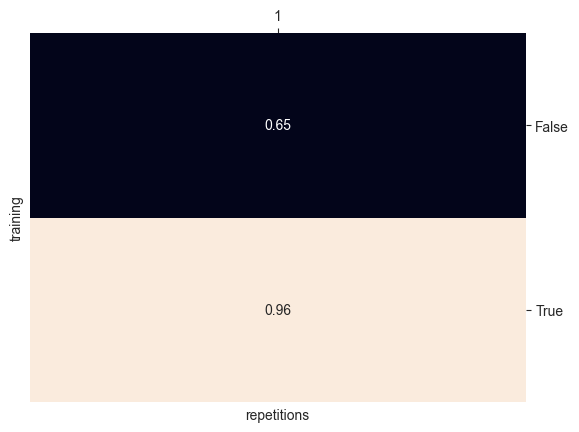

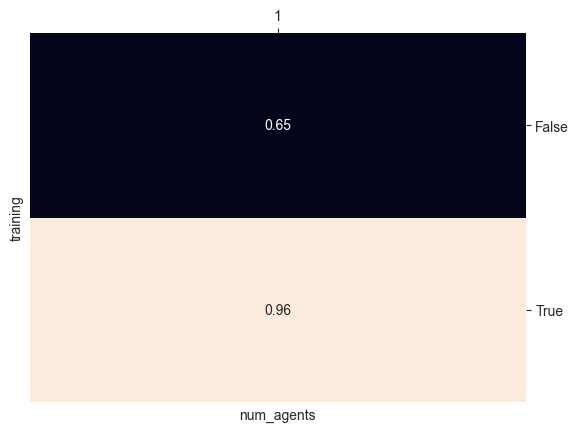

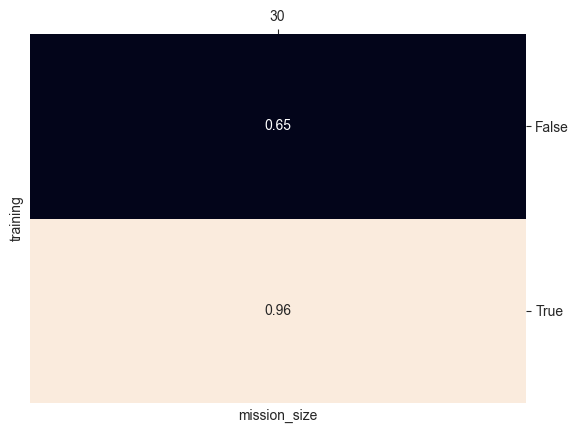

In [25]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [26]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"\nAvg Reward: {result_df[result_df[column] == value]['controller.avg_reward'].mean()}\n")
    print("\n")

repetitions = 1                                             
Avg Reward: 0.010712963832738781



num_agents = 1                                              
Avg Reward: 0.010712963832738781



mission_size = 30                                           
Avg Reward: 0.010712963832738781



training = True                                             
Avg Reward: 0.008759252080855956

training = False                                            
Avg Reward: 0.010890573992000857





In [27]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['maximum_simulation_steps'])
    if 'target_total_training_time' in result_df:
        result_df['target_total_training_time'] = pd.to_numeric(result_df['target_total_training_time'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])

In [28]:
q_learning_testing = result_df[result_df['training'] == 'False']

# Analysing Q Learning training performance

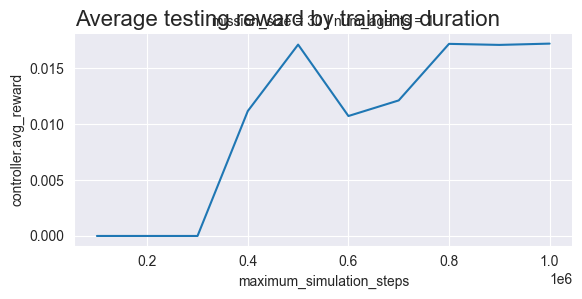

In [29]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='controller.avg_reward', hue='controller_config')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

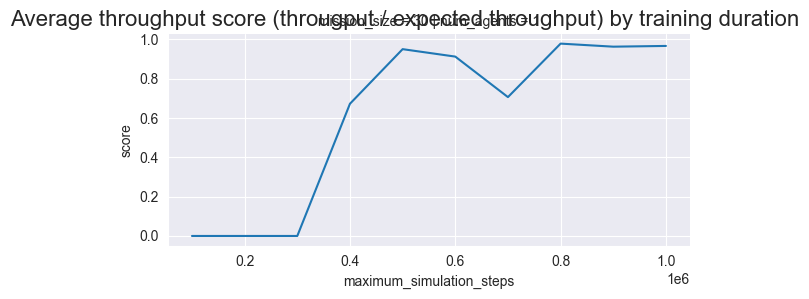

In [30]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='score', hue='controller_config')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average throughput score (througput / expected throughput) by training duration', fontsize=16)

plt.show()

In [31]:
avg_rewards = q_learning_testing.groupby('controller_config')['controller.avg_reward'].mean()
top = avg_rewards.sort_values(ascending=False).head(10)
top

controller_config
{'reward_function': <function smooth_unique_packets at 0x0000023645FC1F80>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}    0.010891
Name: controller.avg_reward, dtype: float64

In [32]:
for index, avg in top.iteritems():
    print(index)
    print(avg)
    print("\n\n")

{'reward_function': <function smooth_unique_packets at 0x0000023645FC1F80>, 'epsilon_start': 1, 'epsilon_end': 0.1, 'learning_rate': 0.0005, 'gamma': 0.99, 'memory_size': 10000, 'batch_size': 64, 'hidden_layer_size': 64, 'num_hidden_layers': 2, 'target_network_update_rate': 'auto'}
0.010890573992000859





C:\Users\thlam\AppData\Local\Temp\ipykernel_45448\311878167.py:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

